________________________________________________________________________________
**Import required libraries and modules**
________________________________________________________________________________

In [35]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

________________________________________________________________________________
**Read the data**
________________________________________________________________________________

In [36]:
data = pd.read_csv("/talking_data.csv")

In [37]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


________________________________________________________________________________
**Get statistical information**
________________________________________________________________________________

In [38]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [40]:
data.apply(lambda x: len(x.unique()))

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      228
is_attributed          2
dtype: int64

________________________________________________________________________________
**Preprocessing the dataset**
________________________________________________________________________________

Click_time column has to be conver to proper form

In [41]:
from datetime import datetime
data['click_time'] = pd.to_datetime(data.click_time)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [42]:
data["Month"]=pd.DatetimeIndex(data['click_time']).month
data["Year"]=pd.DatetimeIndex(data['click_time']).year
data["Day"]=pd.DatetimeIndex(data['click_time']).day
data["Hour"]=pd.DatetimeIndex(data['click_time']).hour

In [43]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
 8   Month            100000 non-null  int64         
 9   Year             100000 non-null  int64         
 10  Day              100000 non-null  int64         
 11  Hour             100000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 9.2+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,Month,Year,Day,Hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,2017,7,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,2017,7,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,2017,7,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,2017,7,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,2017,9,9


In [44]:
data.attributed_time

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: attributed_time, Length: 100000, dtype: object

________________________________________________________________________________
**Checking the presence of missing and null values**
________________________________________________________________________________

In [45]:
null_val = data.isnull().sum()
null_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
Month                  0
Year                   0
Day                    0
Hour                   0
dtype: int64

________________________________________________________________________________
**Drop unnessesary columns** 
________________________________________________________________________________



In [46]:
data.drop(['click_time', 'attributed_time'], axis=1, inplace=True)

In [47]:
data.is_attributed

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 100000, dtype: int64

In [48]:
data['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

________________________________________________________________________________
**Exploratory Data Analysis**
________________________________________________________________________________

________________________________________________________________________________
**Outlier detection with Boxplots**
________________________________________________________________________________

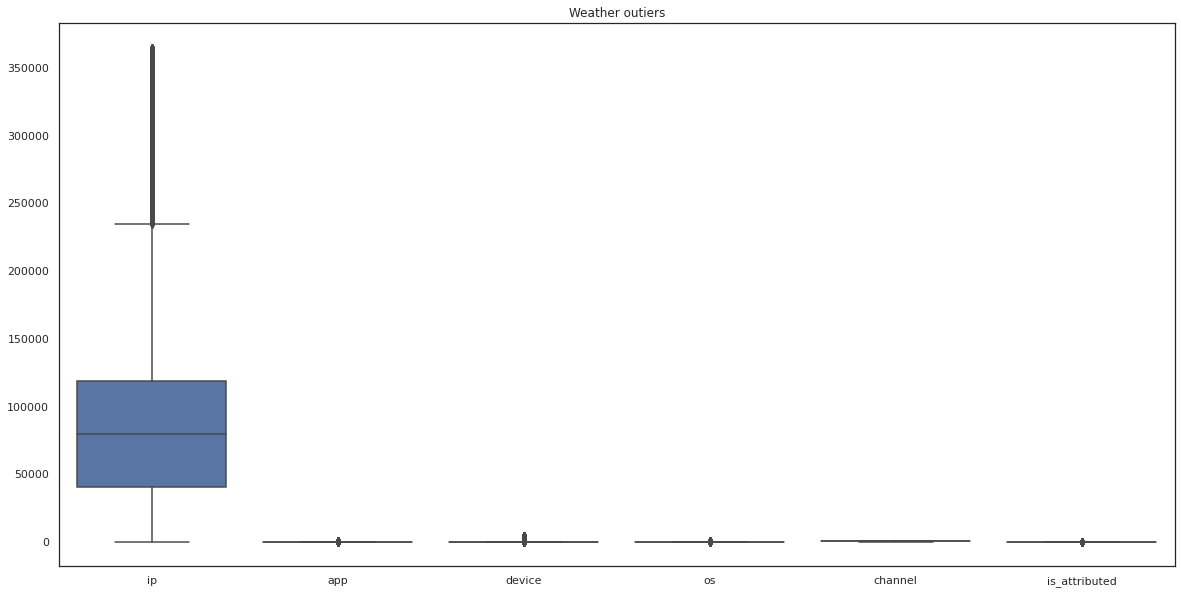

In [49]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=data[['ip', 'app', 'device', 'os', 'channel', 'is_attributed']])
ax.set_title('Weather outiers')
plt.show()

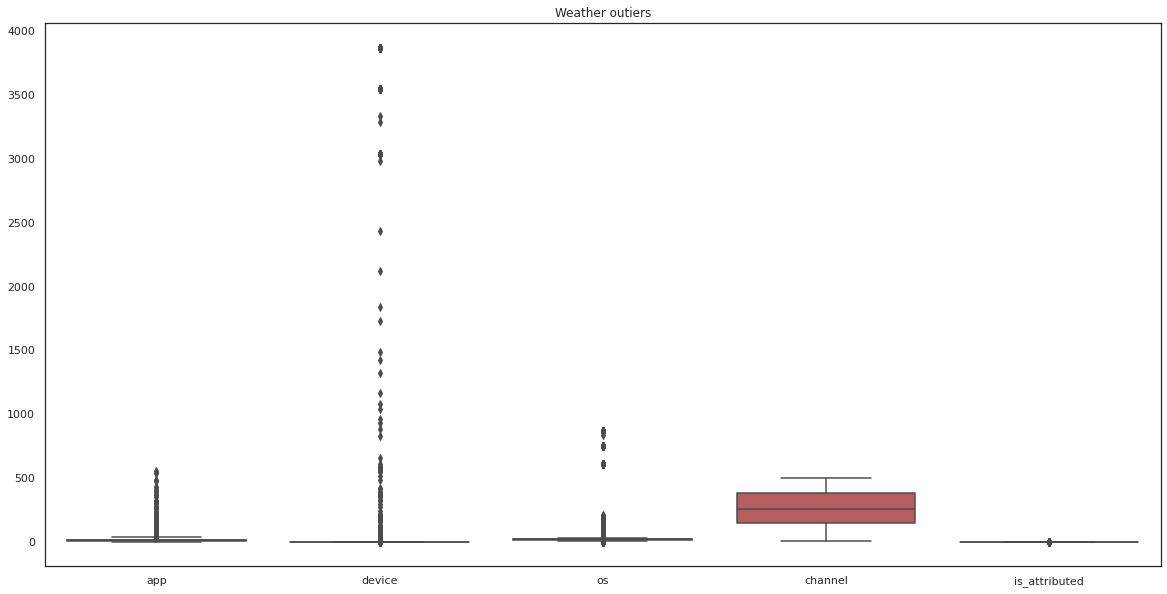

In [50]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=data[['app', 'device', 'os', 'channel', 'is_attributed']])
ax.set_title('Weather outiers')
plt.show()

In [51]:
data.device

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: device, Length: 100000, dtype: int64

________________________________________________________________________________
**Distribution of 'app'**
________________________________________________________________________________

In [52]:
from numpy.lib.function_base import quantile
apps = data.groupby('app').size().reset_index(name='count')
apps = apps[apps['count']>apps['count'].quantile(0.80)]
apps = apps.merge(data, on= 'app',how = 'inner')
apps.head()
apps['app'].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
18      8315
14      5359
1       3135
13      2422
8       2004
21      1979
11      1927
26      1633
23      1454
6       1303
64      1079
7        981
20       911
25       804
28       720
24       704
27       696
19       478
10       388
22       386
17       380
29       360
32       286
5        188
151      109
36       102
150       73
Name: app, dtype: int64

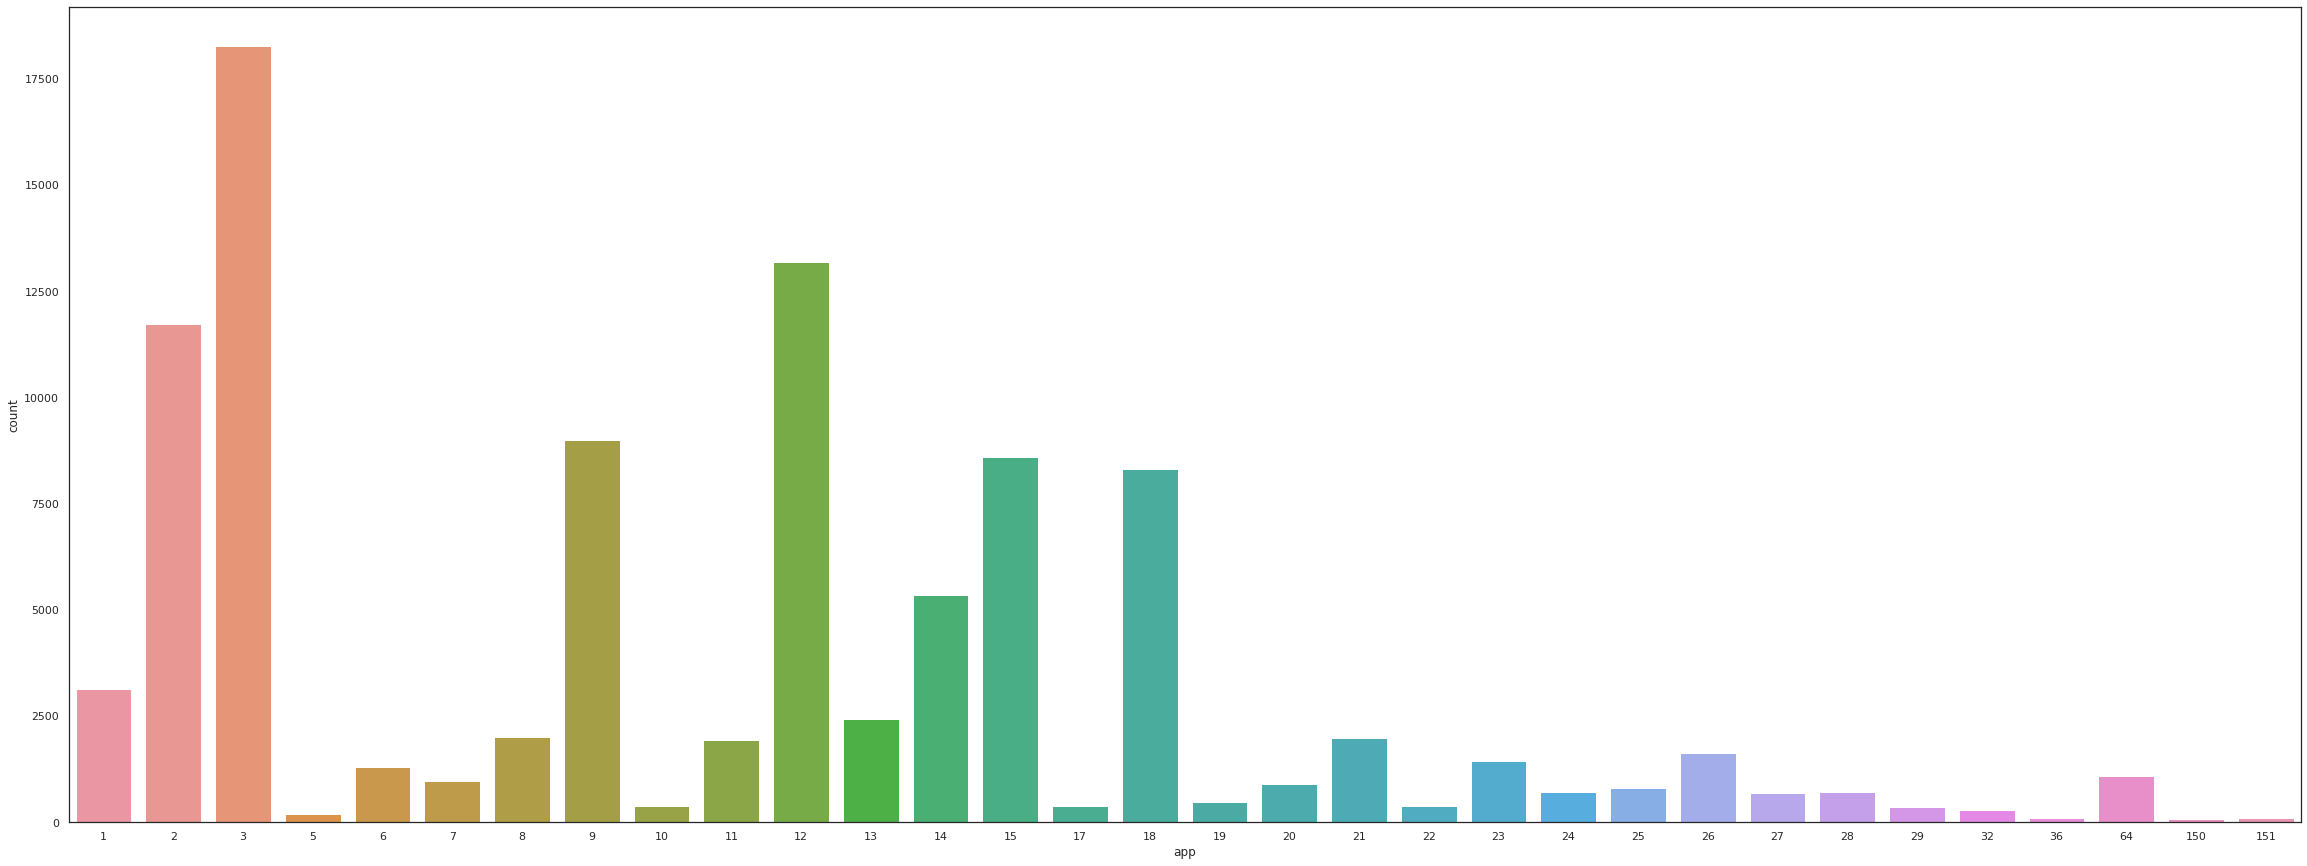

In [53]:
plt.figure(figsize=(40, 15))
sns.countplot(x='app', data=apps)

________________________________________________________________________________
**Distribution of 'device'**
________________________________________________________________________________

In [71]:
devices = data.groupby('device').size().reset_index(name='count')
devices = devices[devices['count']>devices['count'].quantile(0.80)]
devices = devices.merge(data, on= 'device',how = 'inner')
devices.head()
devices['device'].value_counts()

1       94338
2        4345
0         541
3032      371
3543      151
3866       93
59         12
6           8
16          7
5           7
40          7
97          5
50          4
33          3
25          3
21          3
4           3
60          3
Name: device, dtype: int64

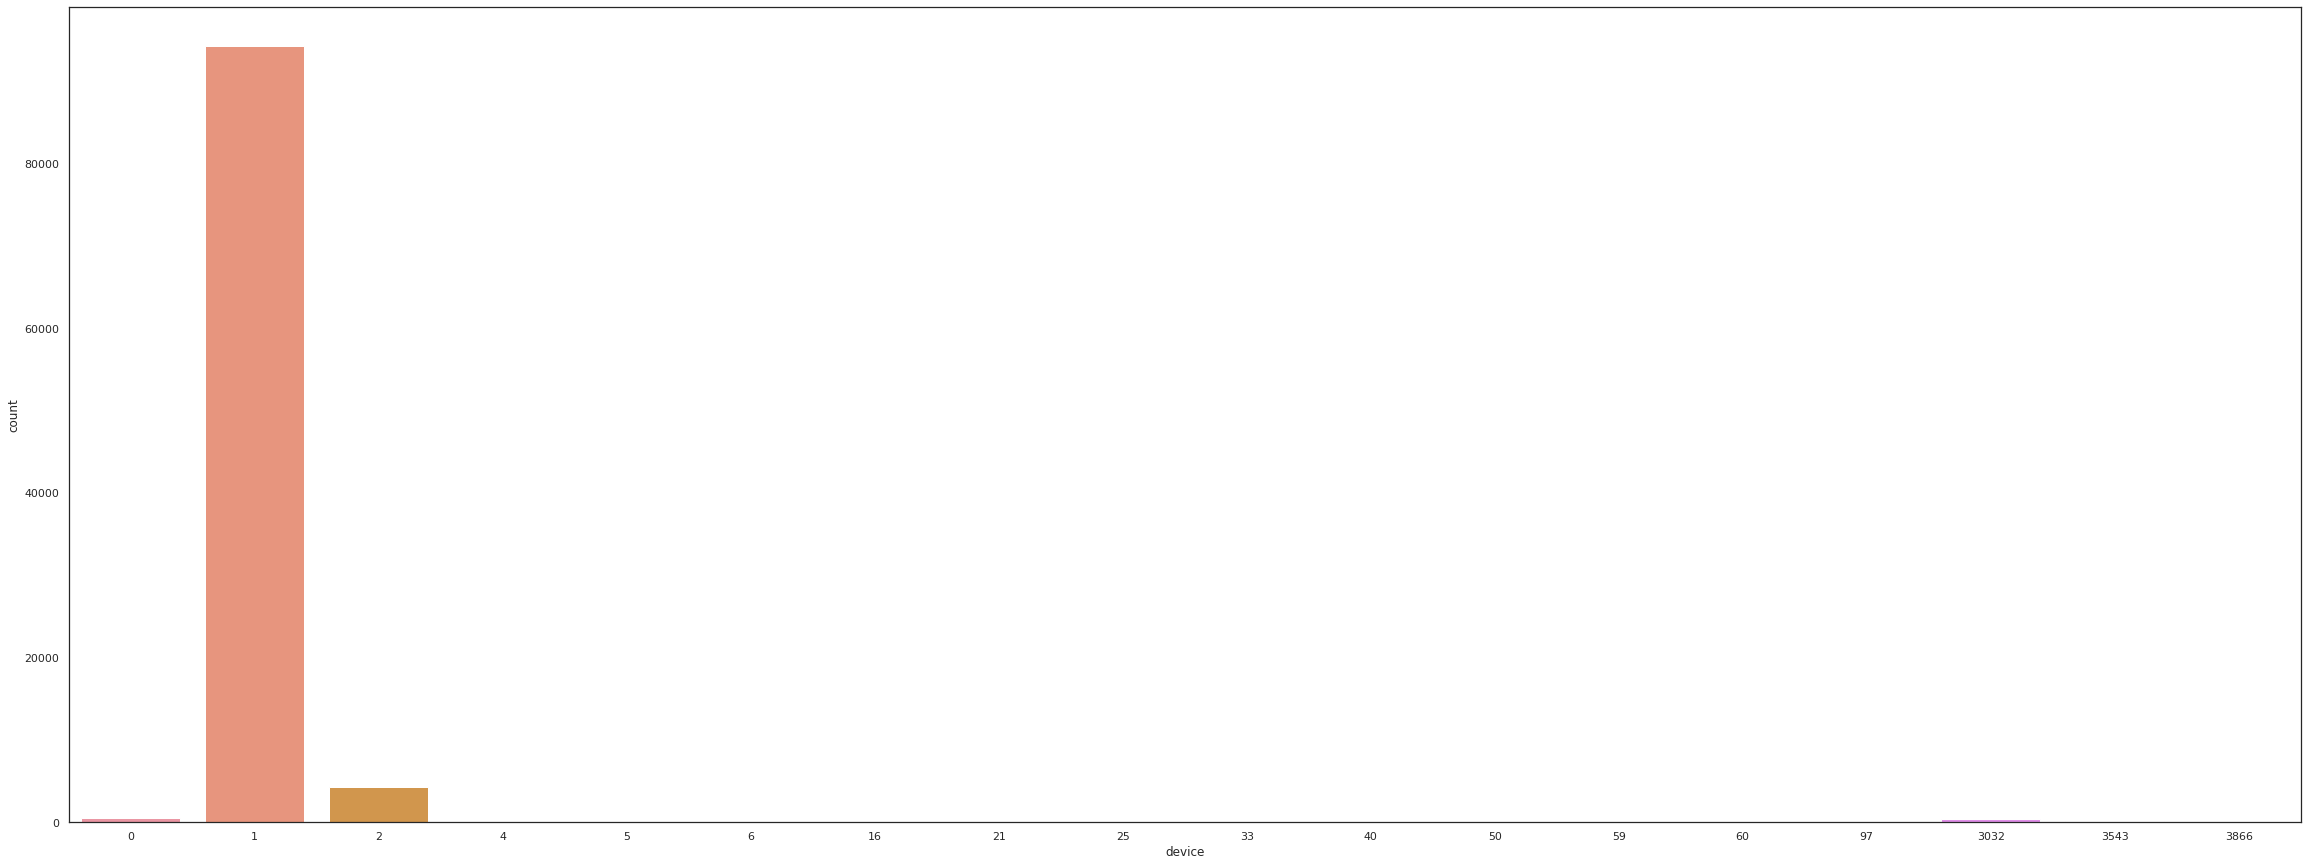

In [74]:
plt.figure(figsize=(40, 15))
sns.countplot(x="device", data=devices)

________________________________________________________________________________
**Various 'channels' get clicks in comparable quantities**
________________________________________________________________________________

In [75]:
channels = data.groupby('channel').size().reset_index(name='count')
channels = channels[channels['count']>channels['count'].quantile(0.80)]
channels = channels.merge(data, on= 'channel',how = 'inner')
channels.head()
channels['channel'].value_counts()

280    8114
245    4802
107    4543
477    3960
134    3224
259    3130
265    3013
153    2954
178    2936
121    2472
205    2369
145    1964
442    1941
459    1921
379    1833
439    1528
128    1486
466    1483
135    1473
480    1468
469    1458
489    1426
237    1408
122    1366
140    1328
219    1303
137    1245
435    1220
232    1211
101    1180
334    1074
409    1053
Name: channel, dtype: int64

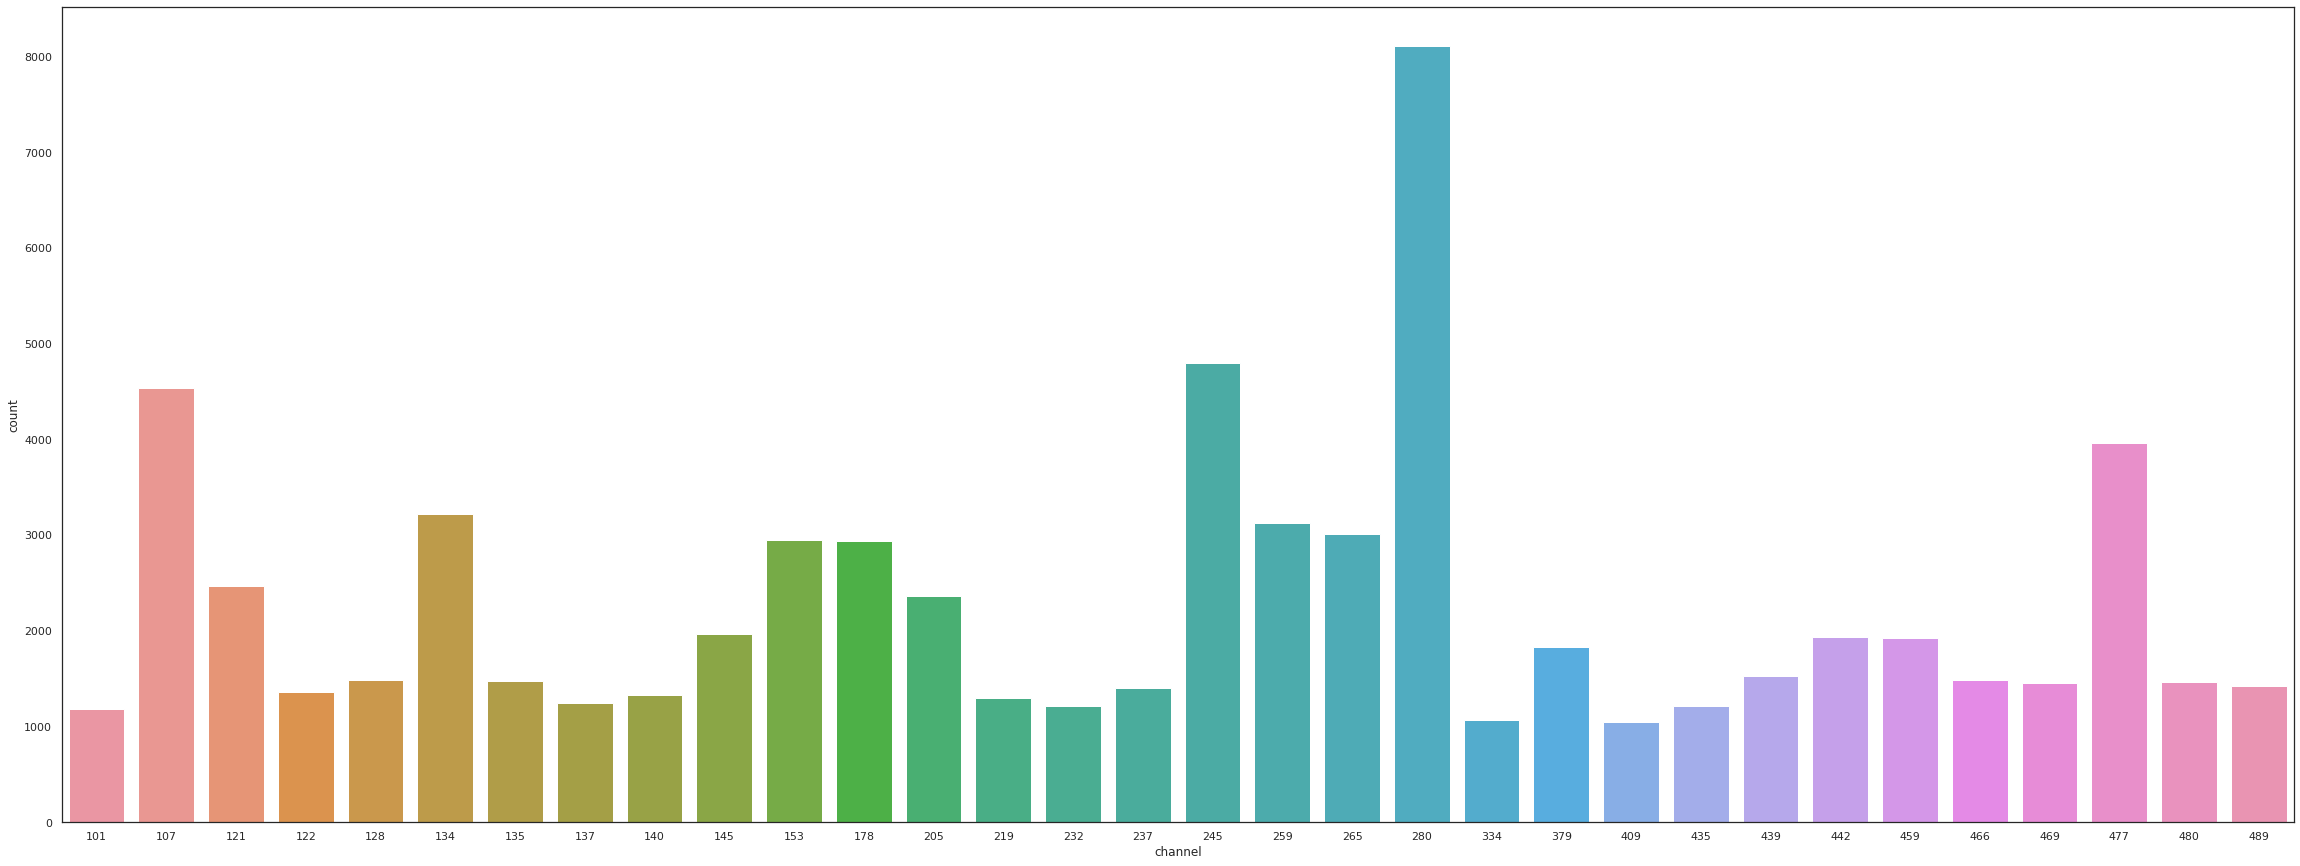

In [78]:
plt.figure(figsize=(40, 15))
sns.countplot(x="channel", data=channels)

________________________________________________________________________________
**Most used OS (Our guess is the two most common OS are Android and iOS)**
________________________________________________________________________________

In [96]:
op_syst = data.groupby('os').size().reset_index(name='count')
op_syst = op_syst[op_syst['count']>op_syst['count'].quantile(0.80)]
op_syst = op_syst.merge(data, on= 'os',how = 'inner')
op_syst.head()
op_syst['os'].value_counts()

19    23870
13    21223
17     5232
18     4830
22     4039
10     2816
8      2775
6      2520
15     2396
20     2347
9      2341
25     2248
16     1691
37     1589
3      1576
41     1348
14     1312
1      1185
12     1103
23     1042
27     1008
32      915
35      914
47      789
53      759
11      752
Name: os, dtype: int64

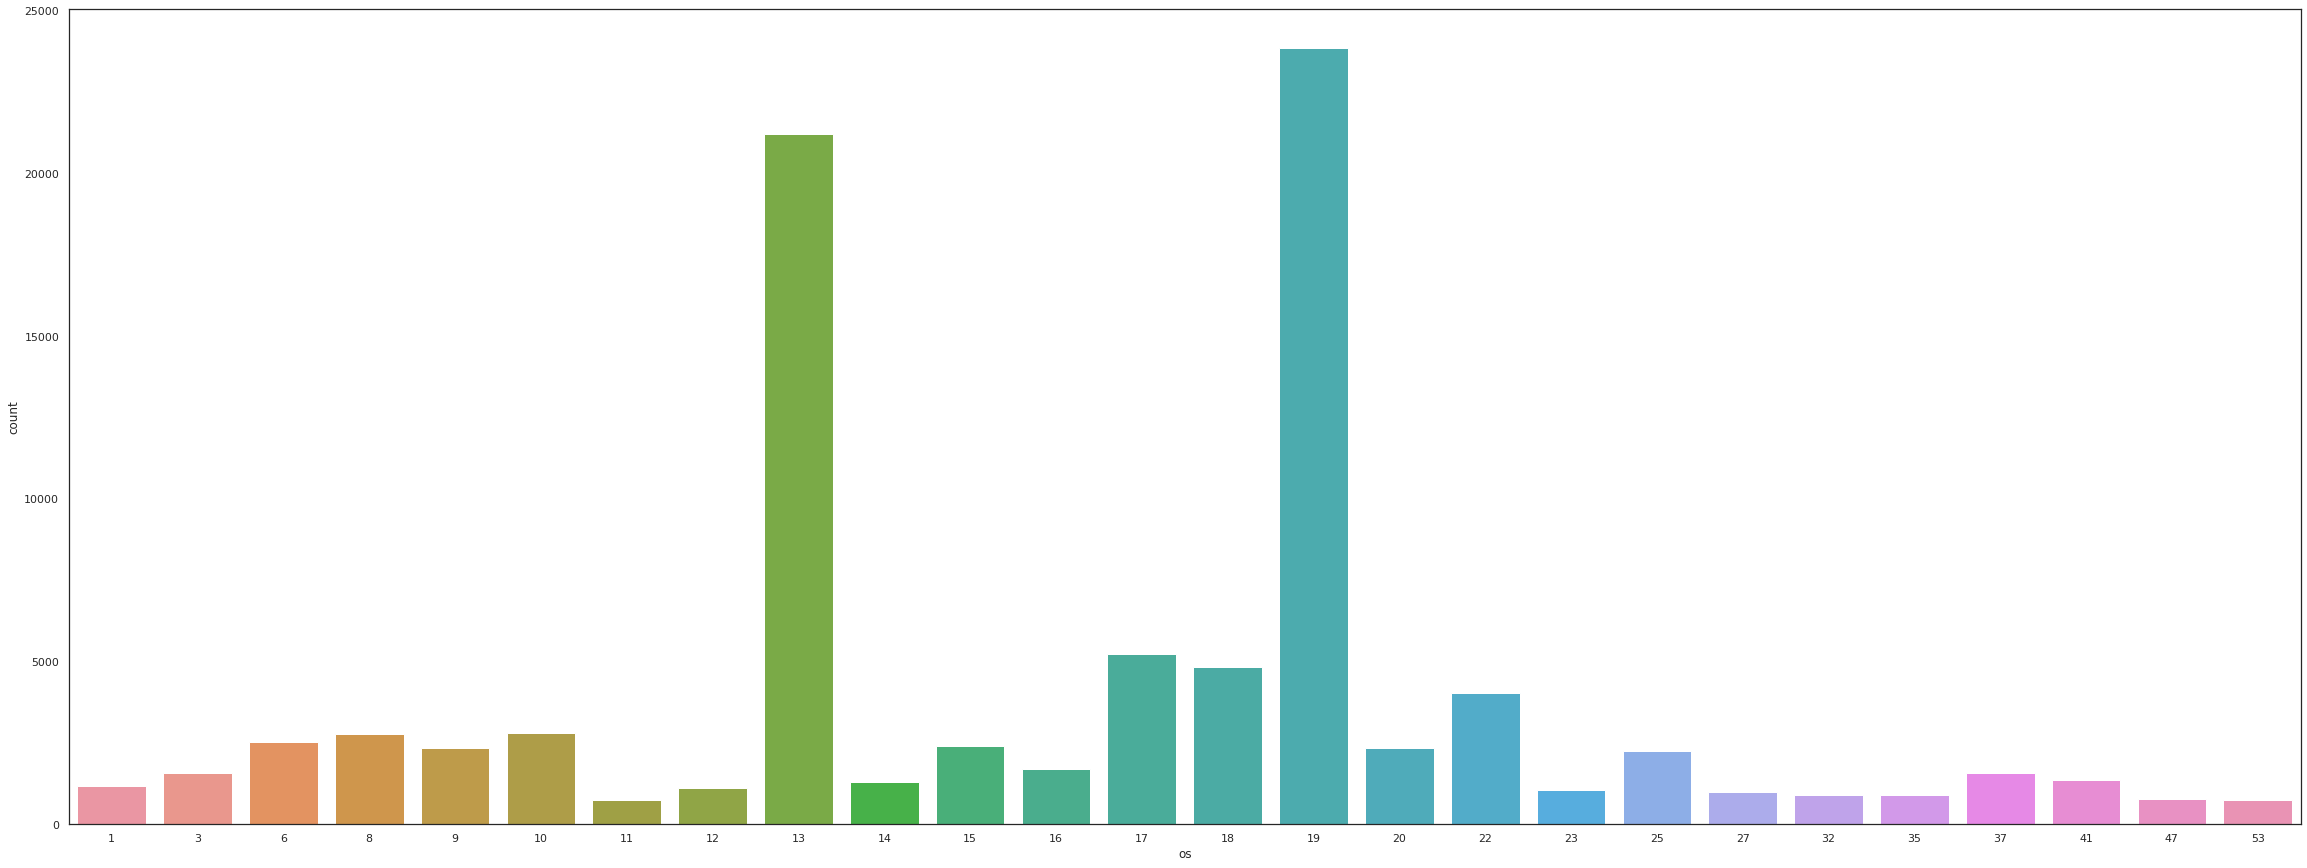

In [98]:
plt.figure(figsize=(40, 15))
sns.countplot(x="os", data=op_syst)

________________________________________________________________________________
**Exploring the Data - Segmented Univariate Analysis**
________________________________________________________________________________

In [58]:
apps = data.groupby('app').size().reset_index(name='count')
apps = apps[apps['count']>apps['count'].quantile(0.80)]
apps = apps.merge(data, on='app', how='inner')
apps.head()

,app,count,ip,device,os,channel,is_attributed,Month,Year,Day,Hour
0,1,3135,17059,1,17,135,0,11,2017,9,1
1,1,3135,52432,1,13,115,0,11,2017,7,17
2,1,3135,89242,1,27,124,0,11,2017,7,9
3,1,3135,123994,1,19,101,0,11,2017,9,14
4,1,3135,34067,1,15,134,0,11,2017,7,15


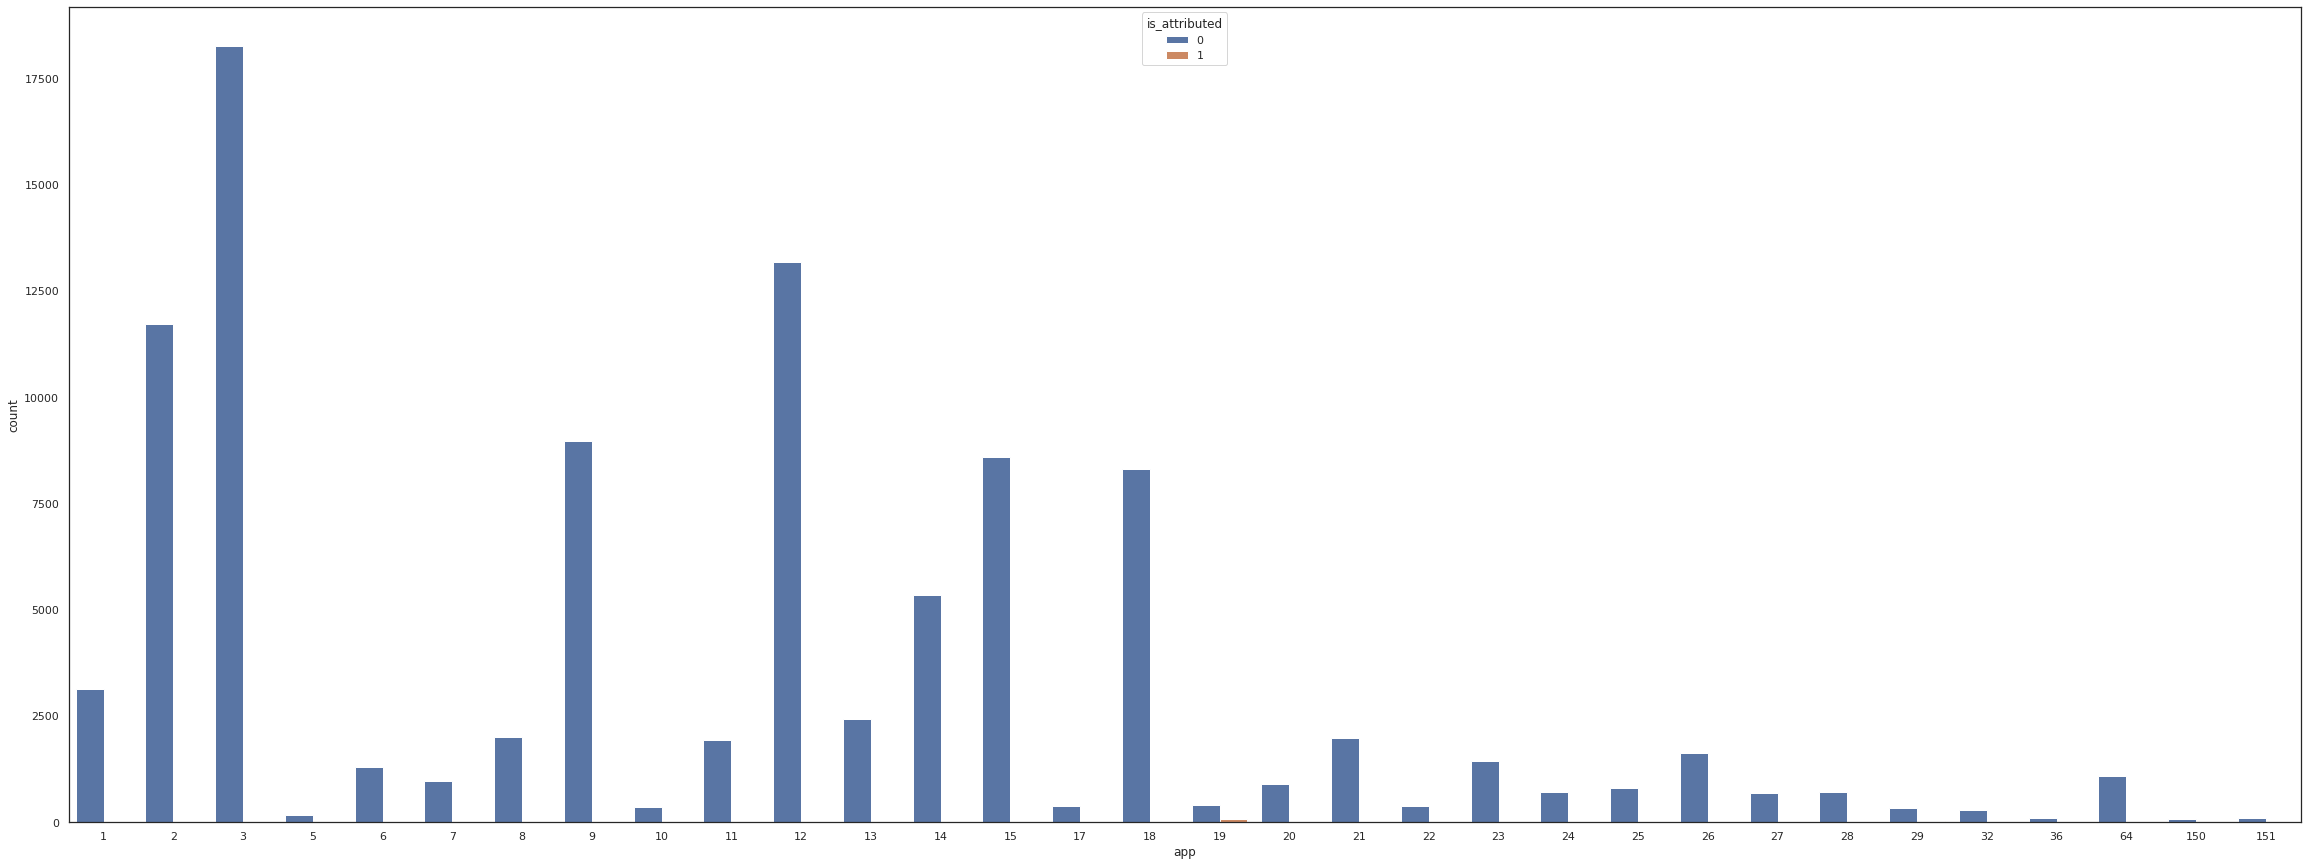

In [99]:
plt.figure(figsize=(40,15))
sns.countplot(x="app", hue="is_attributed", data=apps)

________________________________________________________________________________
**Plotting the coorelation matrix**
________________________________________________________________________________

In [60]:
data_no_time = data.drop(['Day', 'Month', 'Year'], axis=1)

Correlation between variables: 


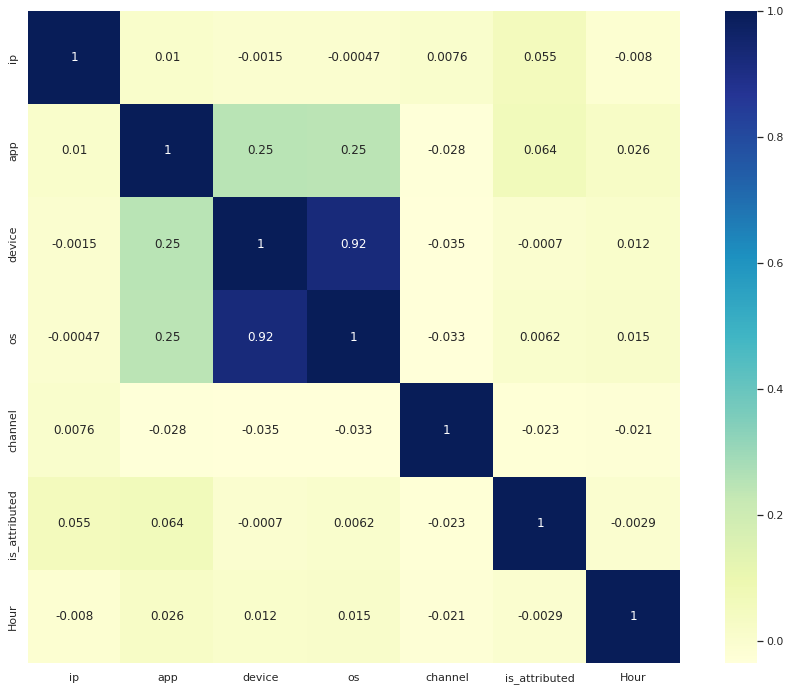

In [61]:
print("Correlation between variables: ")
corr=data_no_time.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,cmap="YlGnBu",square=True)

________________________________________________________________________________
**After visualizing the data, we start working on preparing it for algorithms**
________________________________________________________________________________

________________________________________________________________________________
**Splitting of Data into Training and Test Datasets**
________________________________________________________________________________

In [62]:
df1=data['is_attributed']

In [63]:
X = data.drop(['is_attributed'],axis=1)
y = df1

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
print(y_train.mean())
print(y_test.mean())

0.0023875
0.0018


In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (100000, 9)
Shape of X after SMOTE: (199546, 9)


In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model = LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.75)
model.fit(X_train, y_train)
preds=model.predict(X_test)

________________________________________________________________________________
**Make the confusion matrix, check for True Positives, False Positives, False Negatives, and True negatives**
________________________________________________________________________________

In [81]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[62128 12777]
 [15611 59144]]


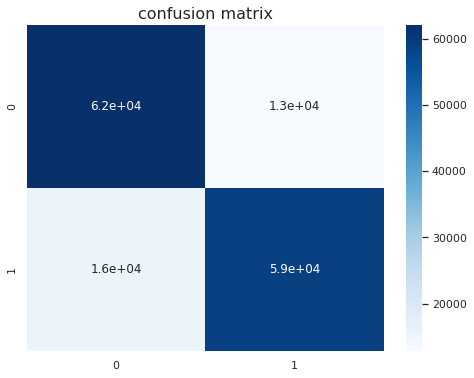

In [82]:
plt.figure(figsize=(8,6))
plt.title('confusion matrix', size=16)
sns.heatmap(cm, cmap='Blues', annot=True)

In [80]:
predictions = model.predict(X_test)

________________________________________________________________________________
**Apply Adaboost Ensemble Algorithm**
________________________________________________________________________________

In [83]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.9228785246558867
The confusion matrix of Adaboost Ensemble model is
[[69422  5483]
 [ 6059 68696]]


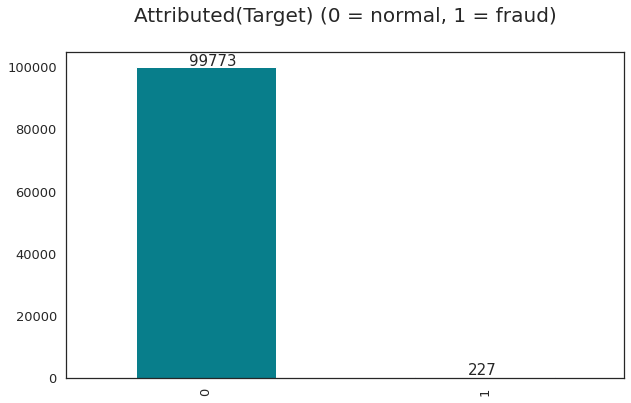

In [84]:
ax = data['is_attributed'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Attributed(Target) (0 = normal, 1 = fraud)', size=20, pad=30)


for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)


________________________________________________________________________________
**Apply the Random forest model**
________________________________________________________________________________

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.936923693705733
The confusion matrix of Random Forest Model is
[[70317  4588]
 [ 4852 69903]]


________________________________________________________________________________
**Apply Bagging Classifier Algorithm**
________________________________________________________________________________

In [86]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9932246425230522
The confusion matrix of Bagging classifier model is
[[74264   641]
 [  373 74382]]


________________________________________________________________________________
**Apply GradientBoost Classifier Algorithm**
________________________________________________________________________________

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.9290391554189497
The confusion matrix of Gradient Boost classifier model is
[[69627  5278]
 [ 5342 69413]]


In [88]:
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Random forest model accuracy is 0.936923693705733
The Adaboost Ensemble model accuracy is 0.9228785246558867
The Bagging classifier model accuracy is 0.9932246425230522
The Gradient Boost classifier model accuracy is 0.9290391554189497


In [89]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (100000, 9)
Shape of X after SMOTE: (199546, 9)


________________________________________________________________________________
**Oversampling with SMOTE**
________________________________________________________________________________

In [90]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  139706
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [93]:
print(cm)

[[62128 12777]
 [15611 59144]]


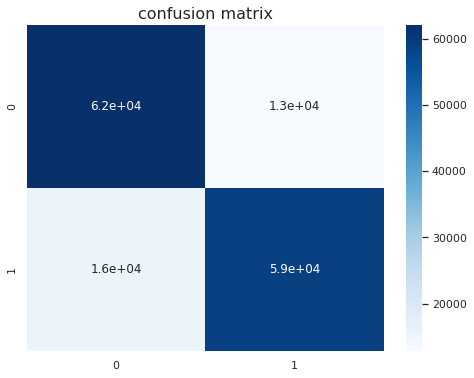

In [95]:
plt.figure(figsize=(8,6))
plt.title('confusion matrix', size=16)
sns.heatmap(cm, cmap='Blues', annot=True)